## AMAZON FINE FOOD REVIEWS:

#### Printing the output

In [31]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option('precision', 2) # show only two decimal digits

#### Importing required packages:

In [32]:
import warnings
warnings.filterwarnings("ignore")                                   #Ignoring unnecessory warnings

import numpy as np                                                  #for large and multi-dimensional arrays                               #for data manipulation and analysis
import nltk 
nltk.download('stopwords')                                          #Natural language processing tool-kit
nltk.download('wordnet')

from nltk.corpus import stopwords                                   #Stopwords 
from nltk.stem import PorterStemmer                                 # Stemmer
from nltk.stem import WordNetLemmatizer                             # Lemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF  

import seaborn as sns                                                #For Plots                          
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import mglearn

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dakshatajain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dakshatajain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Populating the interactive namespace from numpy and matplotlib


#### Reading the file:

In [33]:
df = pd.read_csv('Reviews.csv')

In [34]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Creating the subset: 
<li>Taking only those rows which have been voted (i.e helpful or not) more than 10 times.

In [35]:
df_subset1 = df[(df.HelpfulnessDenominator >= 5)]

In [36]:
len(df_subset1)

67467

#### Creating Y variable: (Useful)

In [37]:
#Creating Helpfulness percentage:
df_subset1['Perc_helpfulness'] = (df.HelpfulnessNumerator / df.HelpfulnessDenominator)

In [38]:
df_subset1['Comment_Len']= df_subset1['Text'].apply(lambda x: len(str(x).split(' ')))

In [39]:
#Subsetting further by taking only highly helpful (Perc_helfulness==1) and not at all helpful (Perc_helfulness<0.3):
df_subset2 = df_subset1[(df_subset1.Perc_helpfulness < 0.5) | (df_subset1.Perc_helpfulness >= 0.95)]

#Creating a dummy variable based on above which defines helpfulness:
df_subset2['Useful'] = (df_subset1.Perc_helpfulness == 1) * 1

In [40]:
df_subset2[df_subset2.Useful == 1].count()

Id                        24539
ProductId                 24539
UserId                    24539
ProfileName               24539
HelpfulnessNumerator      24539
HelpfulnessDenominator    24539
Score                     24539
Time                      24539
Summary                   24539
Text                      24539
Perc_helpfulness          24539
Comment_Len               24539
Useful                    24539
dtype: int64

In [41]:
df_subset2[df_subset2.Useful == 0].count()

Id                        14074
ProductId                 14074
UserId                    14074
ProfileName               14074
HelpfulnessNumerator      14074
HelpfulnessDenominator    14074
Score                     14074
Time                      14074
Summary                   14049
Text                      14074
Perc_helpfulness          14074
Comment_Len               14074
Useful                    14074
dtype: int64

### CLEANING THE DATA AND CREATING FEATURES:

#### Cleaning the data by removing duplicates:

In [42]:
# Identifying number of duplicates:
len(df_subset2) - len(df_subset2.groupby(['UserId','Text','ProfileName','Time'])) ### 2288

#Removing duplicates:
df1 = df_subset2.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

10526

In [43]:
df1= df1[~df1.Summary.isna()]

In [44]:
df1['Smileys_count']= df1.Text.str.count(':\)') + df1.Summary.str.count(':\)')

In [45]:
df1['Exclamation_count']= df1.Text.str.count('!') + df1.Summary.str.count('!')

In [46]:
df1['Sad_Smileys_count']= df1.Text.str.count(':\(') + df1.Summary.str.count(':\(')

#### Creating a list for stopwords:

In [47]:
#Removing stopwords:
stop = set(stopwords.words('english')) 
print(stop)

{'from', 'have', 'with', "shan't", 'you', 'their', 'being', 'aren', "you've", 'a', 'herself', 'd', 'wouldn', 'or', "didn't", 'o', 'then', "shouldn't", "you'd", 'than', 'shouldn', 'me', 'himself', 'against', 'there', 'more', 'shan', 'who', 'to', "should've", "you're", 'and', 'should', 'weren', "hasn't", 'only', 'further', 'she', 'having', 'my', 'isn', 'not', 'has', 'had', "aren't", 'by', 'didn', 'yourself', 'mightn', 'but', 'yourselves', "weren't", 'them', 'an', 'mustn', 'ma', 'can', 'both', 'him', 'over', 't', 'at', 'do', 'once', 'hadn', 'between', "that'll", 've', 'before', 'off', 'all', 'doesn', "haven't", 'too', 'no', 'myself', 'its', "won't", 'y', 'he', 'after', 'because', 're', 'now', "mightn't", 'wasn', 'were', 'until', 'the', 'very', "isn't", 'needn', "mustn't", 'm', 'does', 'how', 'don', 'been', 'while', 'such', "you'll", 'if', 'whom', 'as', 'itself', 'under', "she's", "doesn't", 'in', 'be', 'haven', 'these', 'when', 'so', 'on', 'it', 'what', 'for', 'here', 'hers', 'hasn', 'we'

In [48]:
#Updating the stopwords by not including words like NOt which are important:
stop_upd = {'here','just', 'before', 'other','whom', 'once', 'further', 'now', 'where',\
            'of', 'below', 'it', 'was','themselves', 't', 'been', 'a', 'had', \
            'when', 'those', 'is', 'your', 'out', "that'll",'he', 'have', 'yourself', \
            'more', 'what', 'which', "she's",'why', 'ours', "you'll", 'they', 've', \
            'after', 'we', 'be', 'being', 'off', 'herself', 'mightn', 'she', 'were', \
            'because', 'for', 'over', 'him', 'the','by','can', 'my', 'haven', 'are', 'd', \
            'and','itself', 'or', 'again', 'them','each', 'theirs', 'these', 'if', 're', \
            'does', 'do', 'than', 'am', 'from', 'only', 'about','in',"it's",'ma','any',  \
            'ourselves', 'some','through', 'ain','such','shan', 'their', 'into','did', 'yours',\
            'up', 'with', 'himself', 'on', 'her', 'm', 'our', 'll', 'under',  "you'd", 'won', 'hers',\
            'then', 'how', 'so', 'i', "you've", 'down', 'that', 'both', 'you', 'there', 'as', 'during', \
            'all', 'own', 'myself', 'above', 'to', 'same', 's', 'but', 'this', 'yourselves', 'his', \
            'until', 'doing', 'who', 'o', 'between', 'at', 'having', 'has', 'y', 'its', 'an', "you're", 'me', 'while'}

#### Cleaning Summary and Text column:

#### Includes Lemmatization: converting the words to their root word which is an actual language word

In [49]:
#Reassign:
df2 = df1 

from nltk.stem import PorterStemmer

#Cleaning Using Lemmatization:
temp = []
#wordnet_lemmatizer = WordNetLemmatizer()
snow = nltk.stem.SnowballStemmer('english')

for sentence in df2.Summary:
    sentence = sentence.lower()                          # Converting to lowercase
    cleanr   = re.compile('<.*?>')                      
    sentence = re.sub(cleanr, ' ', sentence)             #Removing HTML tags   
    sentence = re.sub('[^a-z ]+',r'',sentence)          #Removing Punctuations, Numbers
    
    #words = [wordnet_lemmatizer.lemmatize(word,pos='v') for word in sentence.split() if word not in stop_upd]   # Lemmatizing and removing stopwords
    words = [snow.stem(word) for word in sentence.split() if word not in stop_upd]   # Lemmatizing and removing stopwords
    temp.append(words)
        
X_initial = temp            

In [50]:
#Removing quotes from words:
list_words = []
for row in X_initial:
    s1 = ''
    for word in row:
        s1 = s1 + ' ' + word
    list_words.append(s1)

X_initial = list_words
print(X_initial[0])

 best instant oatmeal


### ANALYSIS OF TEXT AND SUMMARY COLUMN (USING BIGRAM):

#### COUNTVECTORIZER ON Summary and TEXT

In [155]:
#Bigram:
count_vect = CountVectorizer(ngram_range=(1,2),min_df=5)
Bigram_data = count_vect.fit_transform(X_initial)
print(Bigram_data[1])

  (0, 1198)	1
  (0, 1175)	1
  (0, 1529)	1


In [156]:
#Converting its output in df:
count_vect_df_bigram = pd.DataFrame(Bigram_data.todense(), columns=count_vect.get_feature_names())

In [157]:
#Merging the two dataframes:
df2.index = count_vect_df_bigram.index
df3_bigram_merged = pd.merge(df2, count_vect_df_bigram, left_index=True, right_index=True)

In [158]:
#Converting score column to dummies:
df3_bigram = pd.get_dummies(df3_bigram_merged,columns=['Score'])

In [55]:
df3_bigram.to_csv("bigram_summary.csv")

In [159]:
#Creating X and Y
X = df3_bigram.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator',\
                    'Time','Summary','Text','Useful','Perc_helpfulness'])
Y = df3_bigram.Useful

In [293]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_training,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)

In [161]:
#Running logistics regression:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(C=1e5) 
logreg_result_summ = logreg.fit(X_train, Y_training) 
y_pred = logreg.predict(X_test)

In [162]:
#Getting the log reg coefficients:
#words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame( data = list(zip(X.columns, logreg_result_summ.coef_[0])),columns = ['feature', 'coef']) 
feature_coefs.sort_values(by='coef')

,feature,coef
3009,veri fast,-6.95
1789,match,-6.40
599,contain sugar,-5.58
294,blk,-5.38
1689,littl too,-5.32
100,arsenic,-5.12
2743,support,-5.12
3198,young,-4.99
1705,look good,-4.95
2915,transit,-4.94


In [173]:
feature_coefs[feature_coefs.feature == 'Exclamation_count']

,feature,coef
3,Exclamation_count,-0.01


In [174]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, Y_training)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best cross-validation score: 0.84
Best parameters:  {'C': 0.1}
Best estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


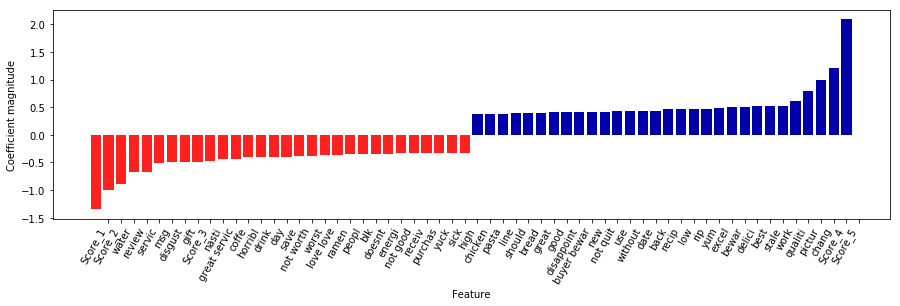

In [175]:
import matplotlib.pyplot as plt

mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, X.columns, n_top_features=30)
plt.show()

In [181]:
X.columns.index = (grid.best_estimator_.coef_)

In [194]:
df = pd.DataFrame(grid.best_estimator_.coef_)

In [198]:
df.columns = X.columns

In [218]:
x = ['Coef']

In [219]:
a.columns = x

In [225]:
a.sort_values('Coef')

,Coef
Score_1,-1.35
Score_2,-1.00
water,-0.89
review,-0.68
servic,-0.67
msg,-0.51
disgust,-0.50
gift,-0.49
Score_3,-0.49
nasti,-0.48


In [221]:
a.index

Index(['HelpfulnessDenominator', 'Comment_Len', 'Smileys_count',
       'Exclamation_count', 'Sad_Smileys_count', 'abl', 'absolut',
       'absolut aw', 'absolut best', 'absolut delici',
       ...
       'yummiest', 'yummm', 'zero', 'zero star', 'zevia', 'Score_1', 'Score_2',
       'Score_3', 'Score_4', 'Score_5'],
      dtype='object', length=3220)

In [215]:
a = df.T

In [193]:
grid.best_estimator_.coef_

array([[-0.07537199,  0.00210006,  0.09864897, ..., -0.49137462,
         1.21105006,  2.09188949]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(random_state = 2)
cl.fit(X_train,Y_training)

In [196]:
lr = grid.best_estimator_
lr.fit(X_train, Y_training)
lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, Y_test)))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

Score: 0.87


In [63]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [226]:
# Show Lasso coefficients
def lassoRegression(para1, para2):
    lasso = Lasso(alpha = 0.00008, fit_intercept=True, normalize=True, max_iter=1000, )
    lasso.fit(para1, para2)
    return lasso.coef_

model_lasso = lassoRegression(X_train,Y_training)

In [249]:
len(model_lasso[model_lasso != 0])

17

In [228]:
Lasso_coef = pd.DataFrame(model_lasso)

In [233]:
Lasso_coef = Lasso_coef.T

In [234]:
Lasso_coef.columns = X.columns

In [237]:
Lasso_coef = Lasso_coef.T

In [239]:
Lasso_coef.columns = x

In [243]:
Lasso_coef.sort_values('Coef',ascending=False)

,Coef
Score_5,4.45e-01
Score_4,3.26e-01
chang,1.74e-01
pictur,9.15e-02
buyer bewar,7.36e-02
good,5.12e-03
qualiti,3.88e-03
great,2.23e-03
Comment_Len,6.59e-05
pad,0.00e+00


In [244]:
Lasso_coef[Lasso_coef.Coef != 0]

,Coef
HelpfulnessDenominator,-3.91e-03
Comment_Len,6.59e-05
blk,-1.35e-01
buyer bewar,7.36e-02
chang,1.74e-01
good,5.12e-03
great,2.23e-03
great servic,-2.12e-02
like water,-8.75e-02
pictur,9.15e-02


In [142]:
colnames

Index(['HelpfulnessDenominator', 'Comment_Len', 'Smileys_count',
       'Exclamation_count', 'Sad_Smileys_count', 'abl', 'absolut',
       'absolut aw', 'absolut best', 'absolut delici', 'absolut favorit',
       'absolut wonder', 'accept', 'acid', 'acquir', 'acquir tast', 'activ'],
      dtype='object')

([<matplotlib.axis.XTick at 0x1c2ba719e8>,
 <a list of 20 Text xticklabel objects>)

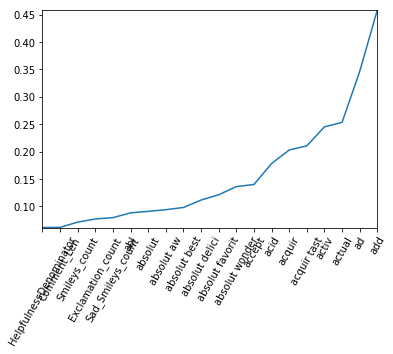

In [112]:
# Plot the coefficients
plt.plot(range(len(colnames)), a[-20:])
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.000001)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [251]:
log =LogisticRegression(penalty = 'l1', solver = 'liblinear')
log.fit(X_train,Y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [252]:
log.coef_

array([[-0.08023816,  0.00203924,  0.0697555 , ..., -0.71483488,
         1.12144341,  2.00132211]])

In [268]:
log_coef = pd.DataFrame(log.coef_)

In [270]:
log_coef.columns = X.columns

In [273]:
log_coef = log_coef.T

In [275]:
log_coef.columns = x

In [279]:
log_coef[log_coef.Coef != 0].sort_values('Coef',ascending = False)

,Coef
nutrient,3.50
appear,2.66
mold,2.31
cal,2.31
purchas amazon,2.26
not quit,2.17
disappoint product,2.06
line,2.05
pictur,2.05
Score_5,2.00


In [291]:
cols = ['HelpfulnessDenominator', 'Comment_Len', 'blk', 'buyer bewar', 'chang',
       'good', 'great', 'great servic', 'like water', 'pictur', 'qualiti',
       'review', 'water', 'Score_1', 'Score_2', 'Score_4', 'Score_5']

In [419]:
X_test_1 =X_test[['HelpfulnessDenominator', 'Comment_Len', 'blk', 'buyer bewar', 'chang',
       'good', 'great', 'great servic', 'like water', 'pictur', 'qualiti',
       'review', 'water', 'Score_1', 'Score_2', 'Score_4', 'Score_5']]

In [297]:
X_train_1 = X_train[['HelpfulnessDenominator', 'Comment_Len', 'blk', 'buyer bewar', 'chang',
       'good', 'great', 'great servic', 'like water', 'pictur', 'qualiti',
       'review', 'water', 'Score_1', 'Score_2', 'Score_4', 'Score_5']]

In [413]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators=1000,random_state = None,max_depth=3)
cl.fit(X_train_1,Y_training)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [414]:
small_tree = cl.estimators_[3]

In [415]:
features = X_train_1.columns

In [416]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(small_tree, out_file='small_tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'small_tree.png')



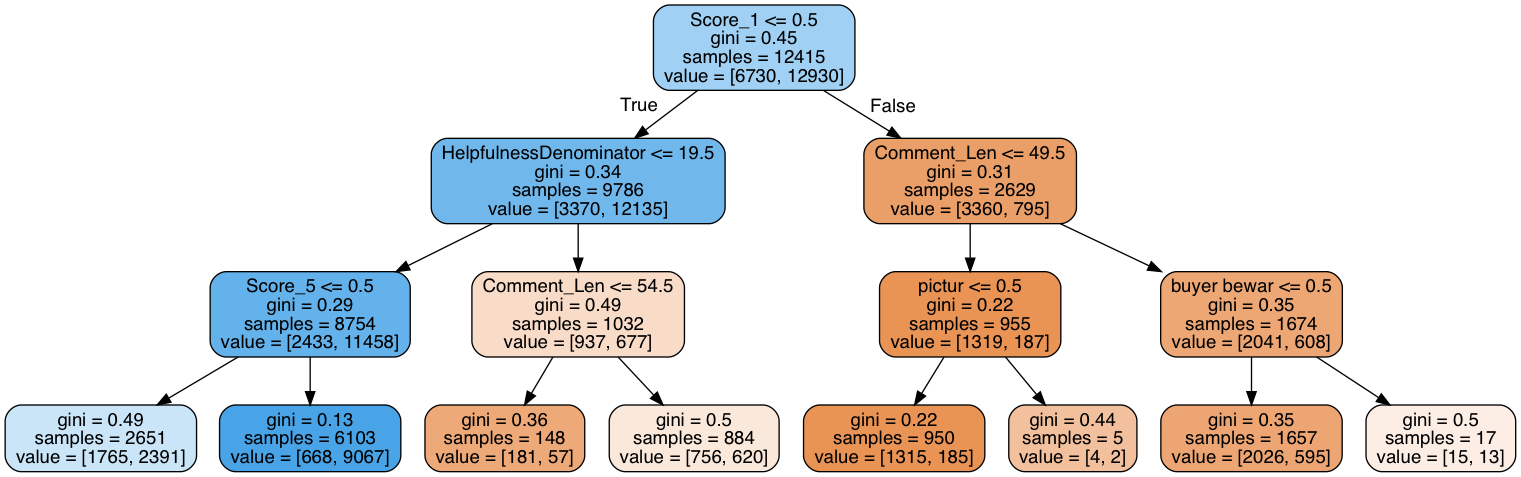

In [417]:
graph = pydotplus.graph_from_dot_file('small_tree.dot')
Image(graph.create_png())

In [420]:
y_pred = cl.predict(X_test_1)

In [421]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[1793,  969],
       [ 530, 5134]])

In [422]:
1 - (y_pred - Y_test ).abs().mean()

0.8220982672679801

In [423]:
import sklearn
sklearn.metrics.precision_score(Y_test,y_pred)

0.841225626740947

In [426]:
y_proba = cl.predict_proba(X_test_1)[:,1]

In [427]:
sklearn.metrics.roc_auc_score(Y_test,y_proba)

0.890411211528942